In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("food_KN.csv")
print(data)

    Ingredient  Sweetness  Crunchiness   FoodType
0        apple         10            9      fruit
1        bacon          1            4    protein
2       banana         10            1      fruit
3       carrot          7           10  vegetable
4       celery          3           10  vegetable
5       cheese          1            1    protein
6     cucumber          2            8  vegetable
7         fish          3            1    protein
8        grape          8            5      fruit
9   green bean          3            7  vegetable
10     lettuce          1            9  vegetable
11        nuts          3            6    protein
12      orange          7            3      fruit
13        pear         10            7      fruit
14      shrimp          2            3    protein


In [3]:
x = data.iloc[:,1:3].values
print(x)

[[10  9]
 [ 1  4]
 [10  1]
 [ 7 10]
 [ 3 10]
 [ 1  1]
 [ 2  8]
 [ 3  1]
 [ 8  5]
 [ 3  7]
 [ 1  9]
 [ 3  6]
 [ 7  3]
 [10  7]
 [ 2  3]]


In [4]:
y = data.iloc[:,3].values
print(y)

['fruit' 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'vegetable'
 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'fruit' 'fruit'
 'protein']


In [5]:

le = LabelEncoder()

y_new = le.fit_transform(y)

print(y_new)

[0 1 0 2 2 1 2 1 0 2 2 1 0 0 1]


In [6]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
print(y_test)
print("\n")
print(x_test)
print("\n")
print(x_train)
print("\n")
print(y_train)



['vegetable' 'protein' 'fruit' 'fruit']


[[ 3  7]
 [ 3  6]
 [10  9]
 [10  7]]


[[ 1  1]
 [ 8  5]
 [10  1]
 [ 1  4]
 [ 2  3]
 [ 3 10]
 [ 3  1]
 [ 1  9]
 [ 7  3]
 [ 7 10]
 [ 2  8]]


['protein' 'fruit' 'fruit' 'protein' 'protein' 'vegetable' 'protein'
 'vegetable' 'fruit' 'vegetable' 'vegetable']


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print("------tsxt class-----",y_test)
print("----predict class ------",y_predict)

------tsxt class----- ['vegetable' 'protein' 'fruit' 'fruit']
----predict class ------ ['vegetable' 'vegetable' 'fruit' 'fruit']


In [8]:
print(knn.predict_proba(x_test))

[[0.  0.4 0.6]
 [0.  0.4 0.6]
 [0.6 0.  0.4]
 [0.6 0.  0.4]]


In [10]:
print(accuracy_score(y_test,y_predict,normalize=True))

0.75


[[2 0 0]
 [0 0 1]
 [0 0 1]]


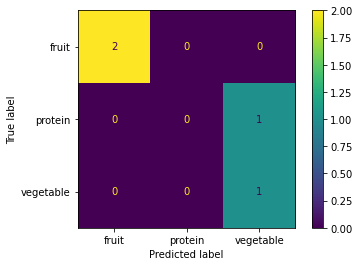

In [11]:
cm = confusion_matrix(y_test,y_predict,normalize=None,labels=knn.classes_)
print(cm)
cm_dis= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()